In [114]:
from scipy.stats import skew
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [115]:
df = pd.read_csv('flight.csv')

| Code | Description |
| ----- | ----------|
| MEMBER_NO-b | ID Member |
| FFP_DATE | Frequent Flyer Program Join Date |
| FIRST_FLIGHT_DATE | Tanggal Penerbangan pertama |
| GENDER  | Jenis Kelamin |
| FFP_TIER | Tier dari Frequent Flyer Program |
| WORK_CITY  | Kota Asal |
| WORK_PROVINCE  | Provinsi Asal |
| WORK_COUNTRY  | Negara Asal |
| AGE  | Umur Customer |
| LOAD_TIME  | Tanggal data diambil  |
| FLIGHT_COUNT  | Jumlah penerbangan Customer |
| BP_SUM | Rencana Perjalanan |
| SUM_YR_1  | Fare Revenue |
| SUM_YR_2  | Votes Prices |
| SEG_KM_SUM | Total jarak(km) penerbangan yg sudah dilakukan |
| LAST_FLIGHT_DATE | Tanggal penerbangan terakhir |
| LAST_TO_END   | Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir |
| AVG_INTERVAL  | Rata-rata jarak waktu |
| MAX_INTERVAL  | Maksimal jarak waktu |
| EXCHANGE_COUNT | Jumlah penukaran |
| avg_discount  | Rata rata discount yang didapat customer |
| Points_Sum  | Jumlah poin yang didapat customer |
| Point_NotFlight  | point yang tidak digunakan oleh members |


In [116]:
df.head(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [117]:
df.shape

(62988, 23)

In [118]:
df.columns

Index(['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER',
       'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'LOAD_TIME',
       'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM',
       'LAST_FLIGHT_DATE', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight'],
      dtype='object')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [120]:
df.duplicated().sum()

0

In [121]:
categorical = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE']
numerical = ['FFP_TIER','AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']
print(f'Categorical Data: {categorical}')
print(f'Numerical Data: {numerical}')

Categorical Data: ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE']
Numerical Data: ['FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']


In [122]:
df[numerical].describe()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [123]:
df[categorical].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


## Cleanup & Missing Values

In [124]:
new_df = df.copy()

In [125]:
new_df.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

Fitur-fitur ini (`WORK_COUNTRY`, `AGE` , `SUM_YR_1`, `SUM_YR_2`, `GENDER`) hanya hilang dengan porsi yang sangat kecil, maka akan kita drop.

In [126]:
missing = new_df[['WORK_COUNTRY','AGE','SUM_YR_1','SUM_YR_2','GENDER']]
for i in missing:
    new_df.dropna(subset=[i], inplace=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61856 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          61856 non-null  int64  
 1   FFP_DATE           61856 non-null  object 
 2   FIRST_FLIGHT_DATE  61856 non-null  object 
 3   GENDER             61856 non-null  object 
 4   FFP_TIER           61856 non-null  int64  
 5   WORK_CITY          59701 non-null  object 
 6   WORK_PROVINCE      58747 non-null  object 
 7   WORK_COUNTRY       61856 non-null  object 
 8   AGE                61856 non-null  float64
 9   LOAD_TIME          61856 non-null  object 
 10  FLIGHT_COUNT       61856 non-null  int64  
 11  BP_SUM             61856 non-null  int64  
 12  SUM_YR_1           61856 non-null  float64
 13  SUM_YR_2           61856 non-null  float64
 14  SEG_KM_SUM         61856 non-null  int64  
 15  LAST_FLIGHT_DATE   61856 non-null  object 
 16  LAST_TO_END        618

In [127]:
new_df[['WORK_CITY', 'WORK_PROVINCE']].mode()

,WORK_CITY,WORK_PROVINCE
0,guangzhou,guangdong


impute missing value dengan nilai modus

In [128]:
new_df['WORK_CITY'].fillna(new_df['WORK_CITY'].mode()[0], inplace=True)
new_df['WORK_PROVINCE'].fillna(new_df['WORK_PROVINCE'].mode()[0], inplace=True)

In [129]:
#rubah date type
new_df['FFP_DATE'] = pd.to_datetime(new_df['FFP_DATE'])
new_df['FIRST_FLIGHT_DATE'] = pd.to_datetime(new_df['FIRST_FLIGHT_DATE'])
new_df['LOAD_TIME'] = pd.to_datetime(new_df['LOAD_TIME'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61856 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          61856 non-null  int64         
 1   FFP_DATE           61856 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  61856 non-null  datetime64[ns]
 3   GENDER             61856 non-null  object        
 4   FFP_TIER           61856 non-null  int64         
 5   WORK_CITY          61856 non-null  object        
 6   WORK_PROVINCE      61856 non-null  object        
 7   WORK_COUNTRY       61856 non-null  object        
 8   AGE                61856 non-null  float64       
 9   LOAD_TIME          61856 non-null  datetime64[ns]
 10  FLIGHT_COUNT       61856 non-null  int64         
 11  BP_SUM             61856 non-null  int64         
 12  SUM_YR_1           61856 non-null  float64       
 13  SUM_YR_2           61856 non-null  float64       
 14  SEG_KM

In [130]:
new_df[numerical].describe()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000,61856.000000
mean,4.103450,42.491108,11.964401,11041.484739,5374.941563,5662.081399,17303.810027,172.606942,68.154935,167.461556,0.324188,0.721649,12681.680953,2.759425
std,0.375833,9.887556,14.116064,16394.475910,8123.952605,8702.731851,21040.271177,181.234370,77.684101,123.155015,1.143987,0.184792,20597.492952,7.406240
min,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,35.000000,3.000000,2591.000000,1020.000000,833.000000,4866.750000,29.000000,23.750000,81.000000,0.000000,0.612650,2847.750000,0.000000
50%,4.000000,41.000000,7.000000,5800.500000,2816.000000,2826.500000,10183.000000,105.000000,45.000000,144.000000,0.000000,0.711827,6442.000000,0.000000
75%,4.000000,48.000000,15.000000,12975.250000,6600.000000,6912.000000,21497.500000,260.000000,82.500000,229.000000,0.000000,0.808825,14457.250000,1.000000
max,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000


- max umur 110??????????????????????????? U SURE BRAH?
- ada tiket yang harganya 0

In [131]:
new_df[new_df.AGE == 110]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
23268,20264,2005-04-14,2005-05-18,Female,4,shenzhenshi,guangdong,CN,110.0,2014-03-31,...,2888.0,14053,4/6/2013,361,50.333333,214,1,0.740881,11194,3


In [132]:
new_df.drop(new_df[new_df.AGE == 110].index, inplace=True)

In [133]:
new_df[categorical].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,61855,61855,61855,61855,61855,61855,61855,61855
unique,3067,3405,2,3198,1153,117,1,731
top,2011-01-13 00:00:00,2013-02-16 00:00:00,Male,guangzhou,guangdong,CN,2014-03-31 00:00:00,3/31/2014
freq,183,92,47298,11479,20465,56732,61855,956
first,2004-11-01 00:00:00,1905-12-31 00:00:00,NaN,NaN,NaN,NaN,2014-03-31 00:00:00,NaN
last,2013-03-31 00:00:00,2015-05-30 00:00:00,NaN,NaN,NaN,NaN,2014-03-31 00:00:00,NaN


FIRST FLIGHT 1905????????????? HOUNTO NI DESUKAAAAAAAAAAAAAAAA????????????????????????????????

In [134]:
new_df[new_df.FIRST_FLIGHT_DATE == '1905-12-31']

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
4455,41193,2011-02-27,1905-12-31,Male,4,dalian,liaoning,CN,35.0,2014-03-31,...,22244.0,52763,3/14/2014,18,18.051282,92,1,0.688062,33588,27
30099,1999,2004-11-10,1905-12-31,Female,4,guangzhoushi,guangdongsheng,CN,37.0,2014-03-31,...,1907.0,9592,11/19/2013,134,75.000000,178,1,0.775909,26192,38


In [135]:
new_df.drop(new_df[new_df.FIRST_FLIGHT_DATE == '1905-12-31'].index, inplace = True)

In [136]:
new_df.drop(columns=('MEMBER_NO'),inplace=True)

# EDA

## Univariate

In [137]:
new_df[numerical].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 61853 entries, 0 to 62986
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FFP_TIER         61853 non-null  int64  
 1   AGE              61853 non-null  float64
 2   FLIGHT_COUNT     61853 non-null  int64  
 3   BP_SUM           61853 non-null  int64  
 4   SUM_YR_1         61853 non-null  float64
 5   SUM_YR_2         61853 non-null  float64
 6   SEG_KM_SUM       61853 non-null  int64  
 7   LAST_TO_END      61853 non-null  int64  
 8   AVG_INTERVAL     61853 non-null  float64
 9   MAX_INTERVAL     61853 non-null  int64  
 10  EXCHANGE_COUNT   61853 non-null  int64  
 11  avg_discount     61853 non-null  float64
 12  Points_Sum       61853 non-null  int64  
 13  Point_NotFlight  61853 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 7.1 MB


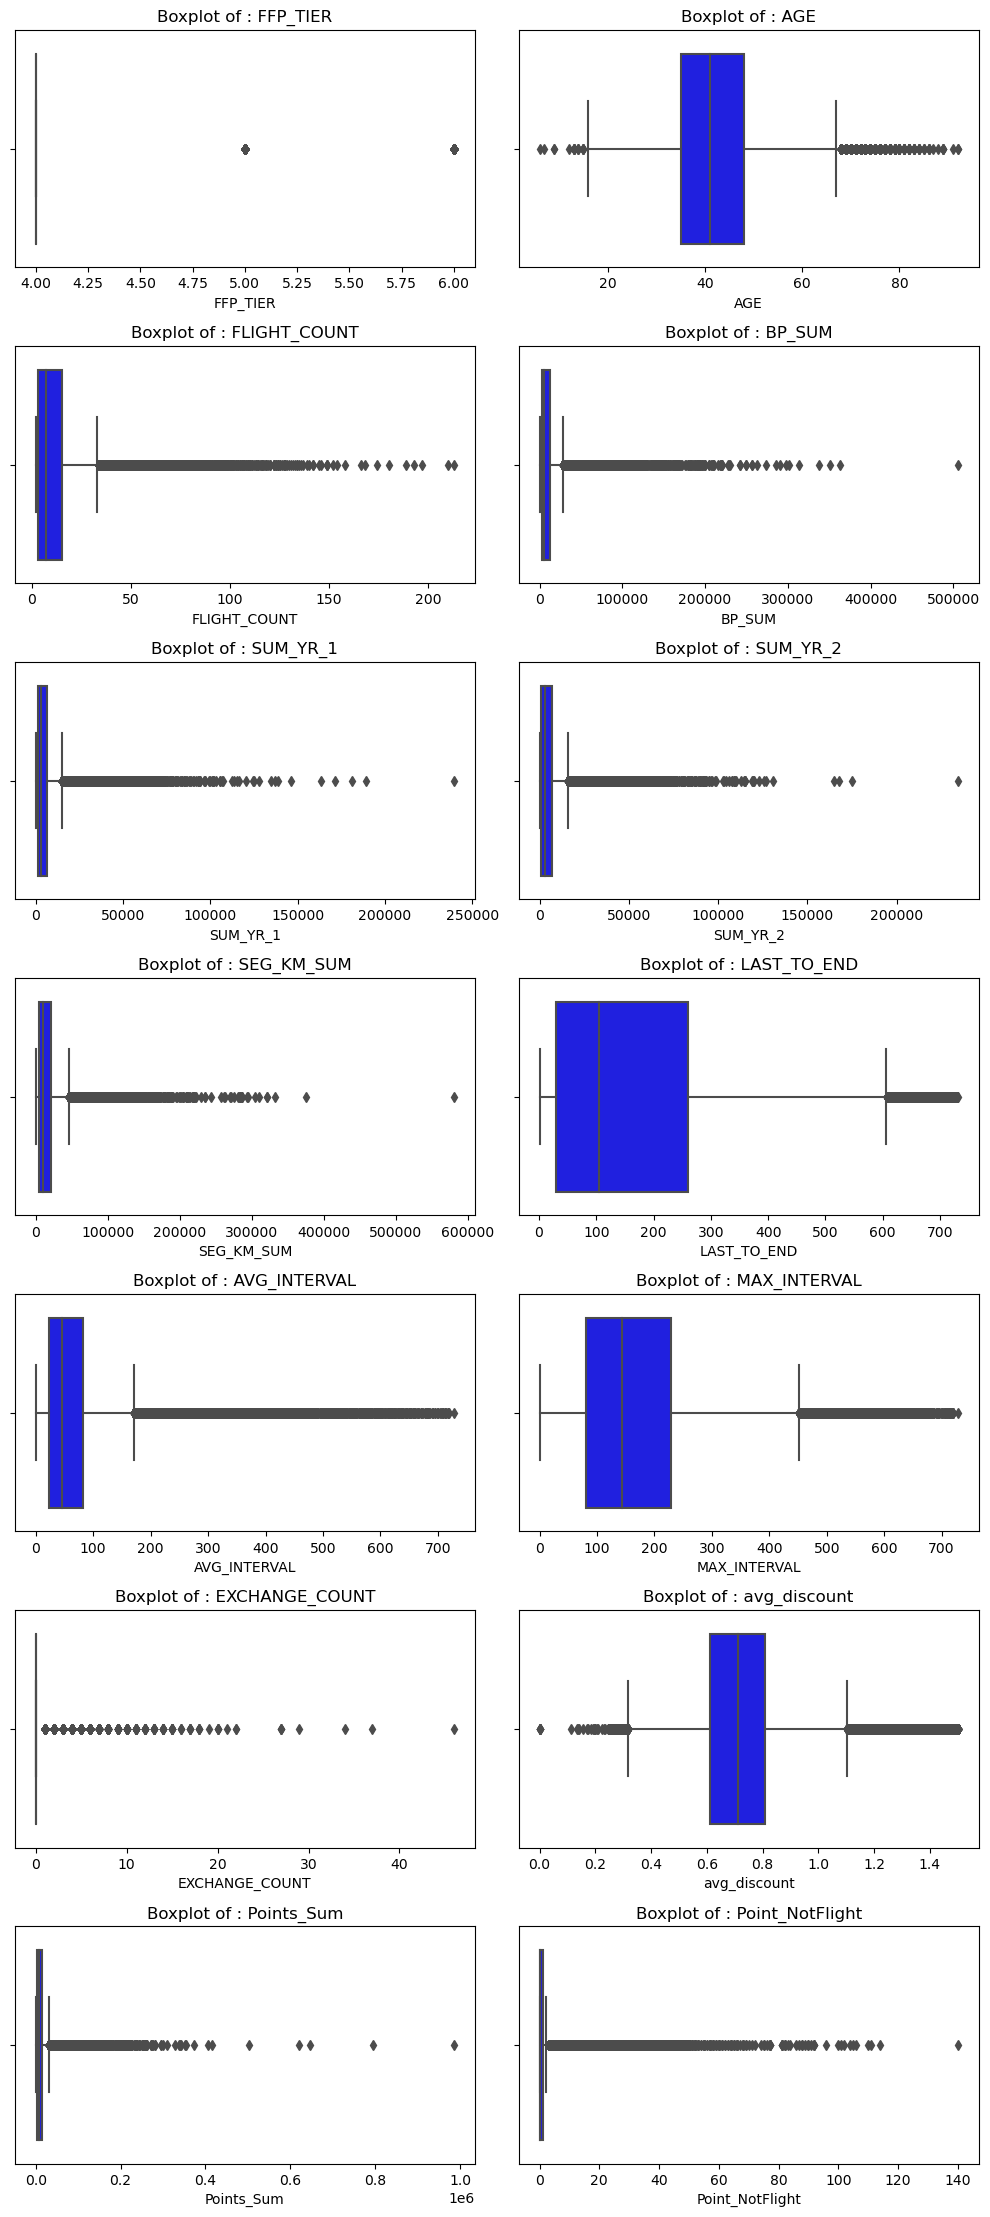

In [138]:
plt.figure(figsize=(10,25))
for i in range(0, len(numerical)):
    plt.subplot(8,2,i+1)
    sns.boxplot(x=new_df[numerical[i]],color ='b')
    title = 'Boxplot of : ' + numerical[i]
    plt.title(title)
    plt.tight_layout()
plt.show()

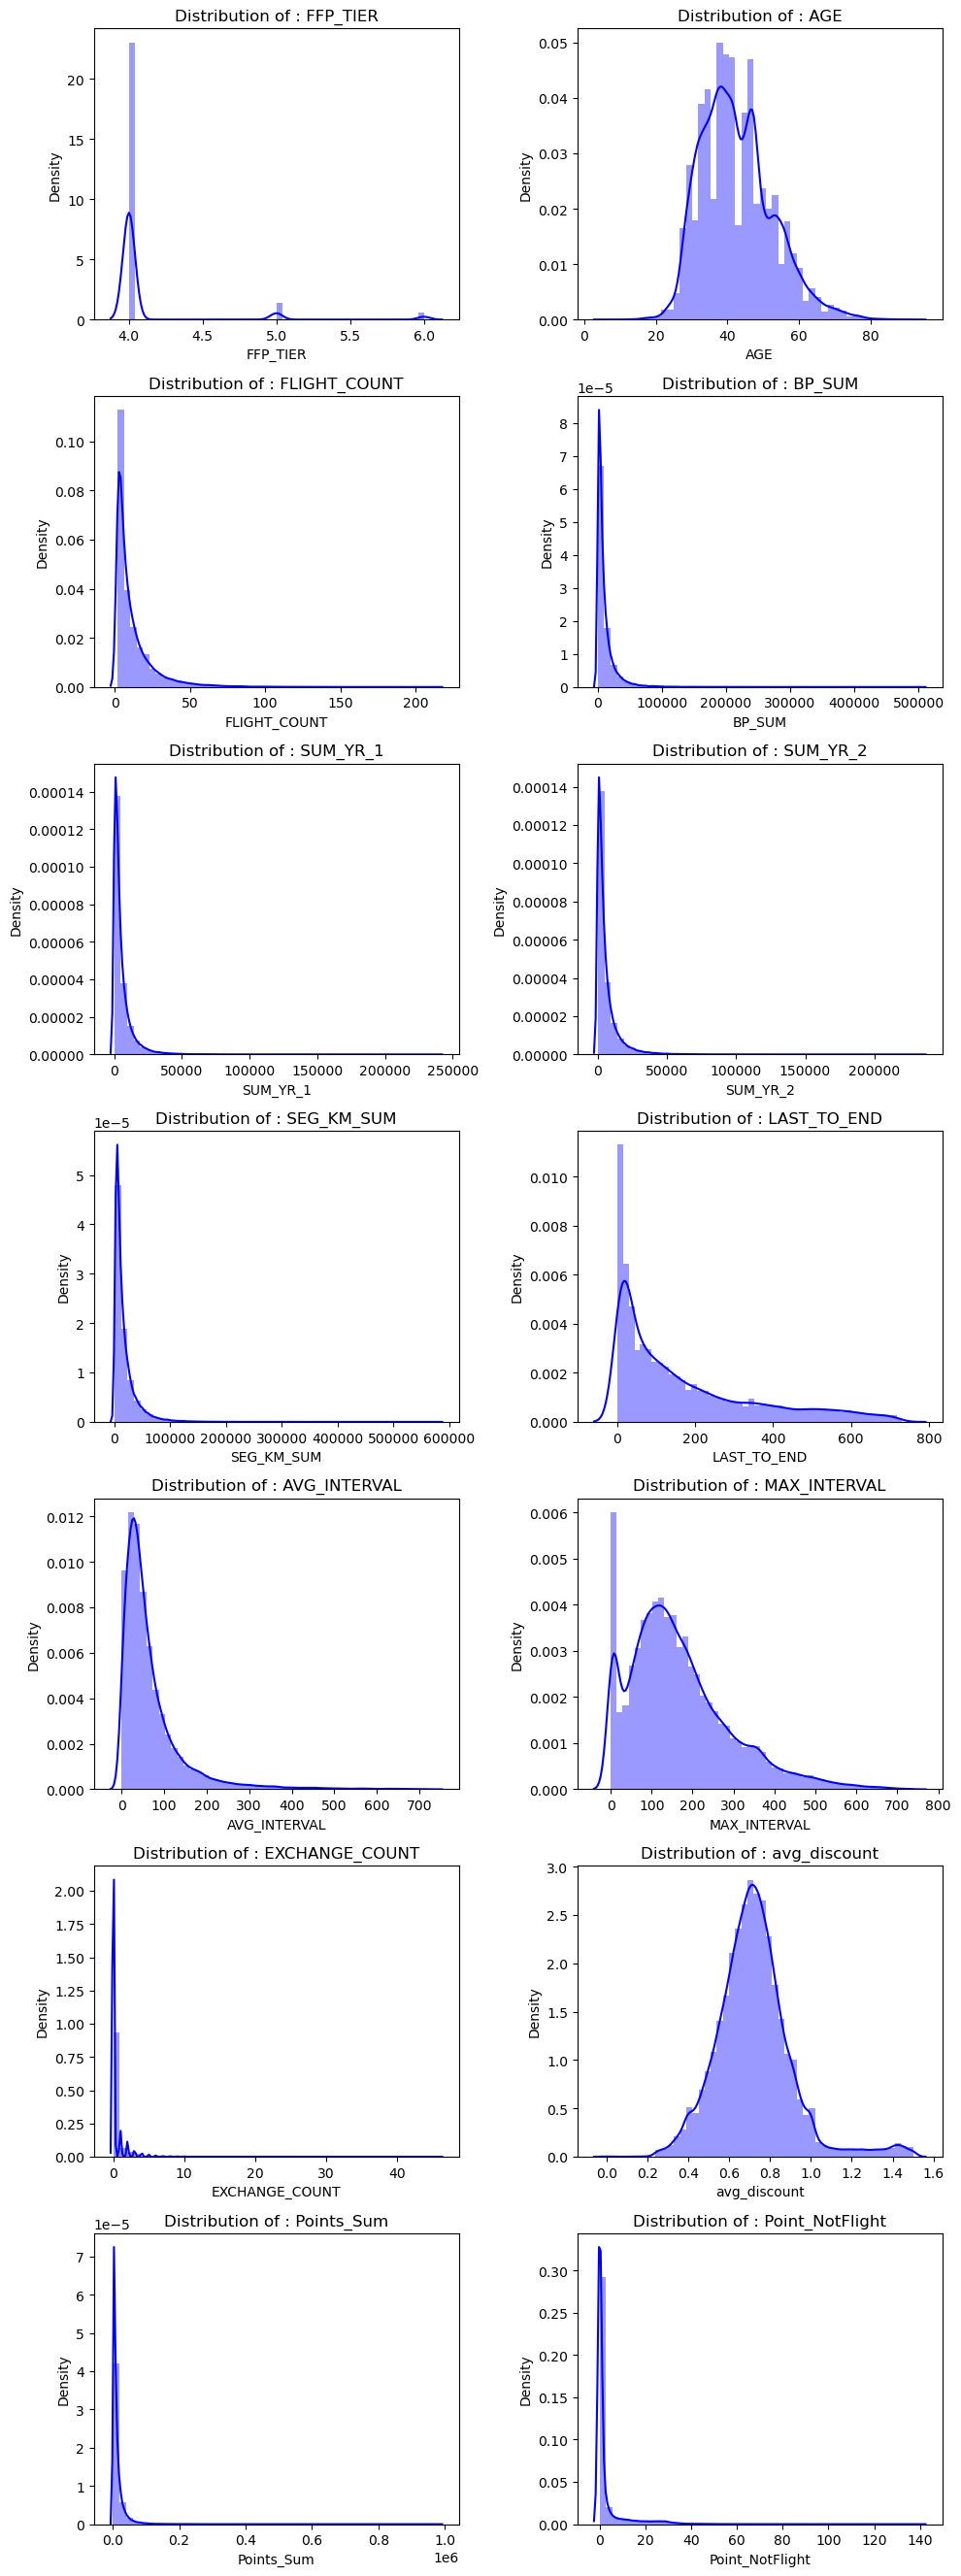

In [139]:
plt.figure(figsize=(10,30))
for i in range(0, len(numerical)):
    plt.subplot(8,2,i+1)
    sns.distplot(new_df[numerical[i]],color='b')
    title = 'Distribution of : ' + numerical[i]
    plt.title(title)
    plt.tight_layout()
plt.show()

In [140]:
new_df[categorical].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61853 entries, 0 to 62986
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           61853 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  61853 non-null  datetime64[ns]
 2   GENDER             61853 non-null  object        
 3   WORK_CITY          61853 non-null  object        
 4   WORK_PROVINCE      61853 non-null  object        
 5   WORK_COUNTRY       61853 non-null  object        
 6   LOAD_TIME          61853 non-null  datetime64[ns]
 7   LAST_FLIGHT_DATE   61853 non-null  object        
dtypes: datetime64[ns](3), object(5)
memory usage: 4.2+ MB


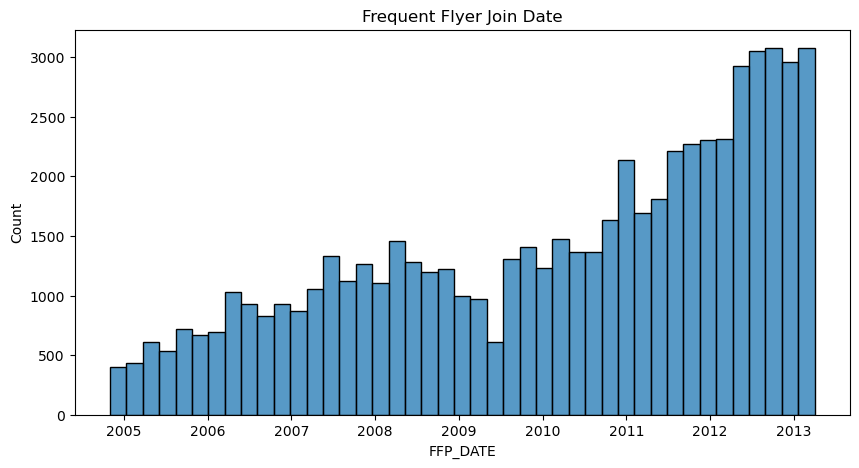

In [141]:
plt.figure(figsize=(10,5))
sns.histplot(x='FFP_DATE', data=new_df)
plt.title('Frequent Flyer Join Date')
plt.show()

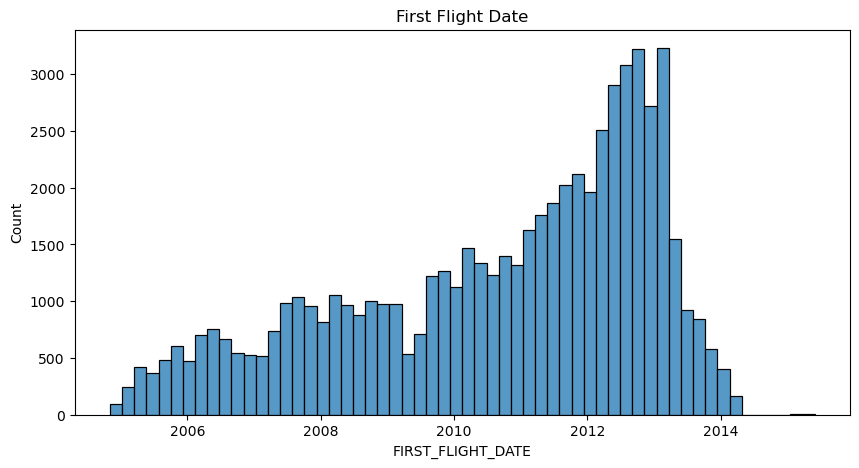

In [142]:
plt.figure(figsize=(10,5))
sns.histplot(x='FIRST_FLIGHT_DATE', data=new_df)
plt.title('First Flight Date')
plt.show()

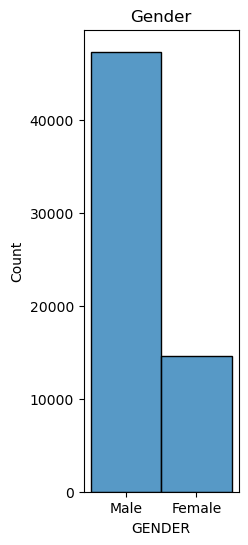

In [143]:
plt.figure(figsize=(2,6))
sns.histplot(x='GENDER', data=new_df)
plt.title('Gender')
plt.show()

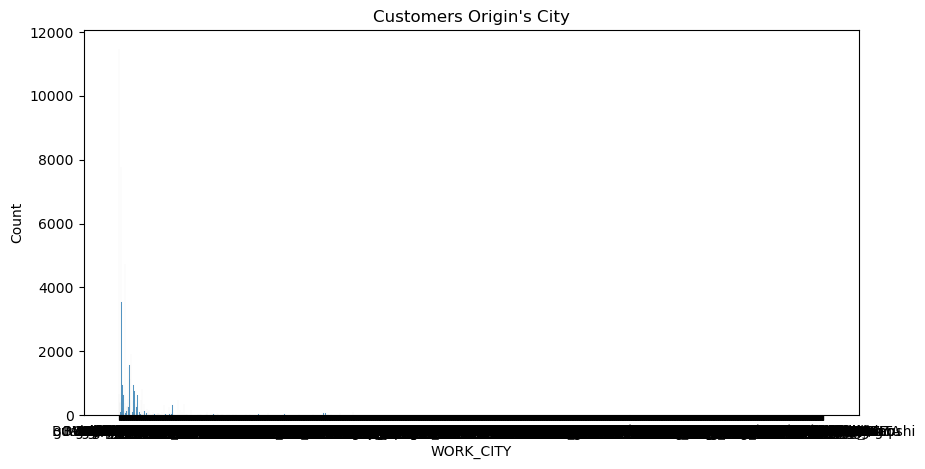

In [144]:
plt.figure(figsize=(10,5))
sns.histplot(x='WORK_CITY', data=new_df)
plt.title("Customers Origin's City")
plt.show()

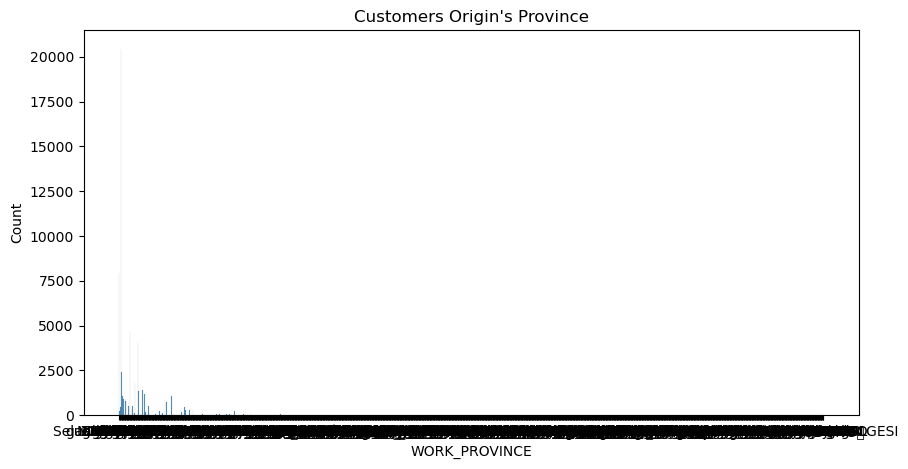

In [145]:
plt.figure(figsize=(10,5))
sns.histplot(x='WORK_PROVINCE', data=new_df)
plt.title("Customers Origin's Province")
plt.show()

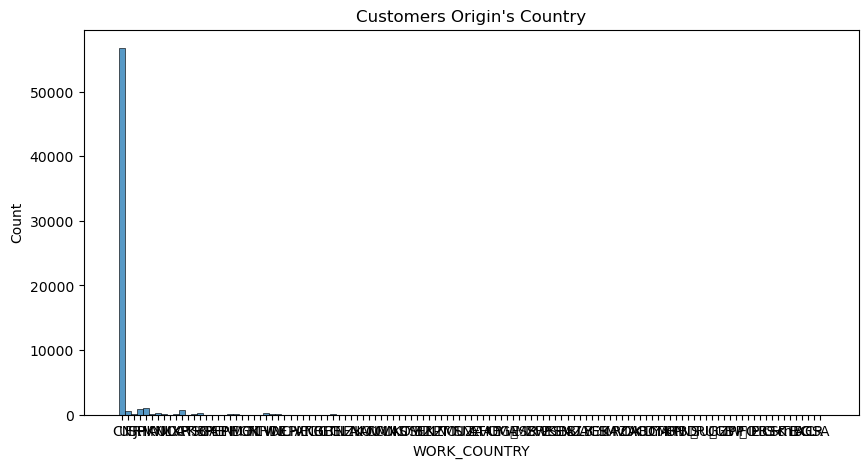

In [146]:
plt.figure(figsize=(10,5))
sns.histplot(x='WORK_COUNTRY', data=new_df)
plt.title("Customers Origin's Country")
plt.show()

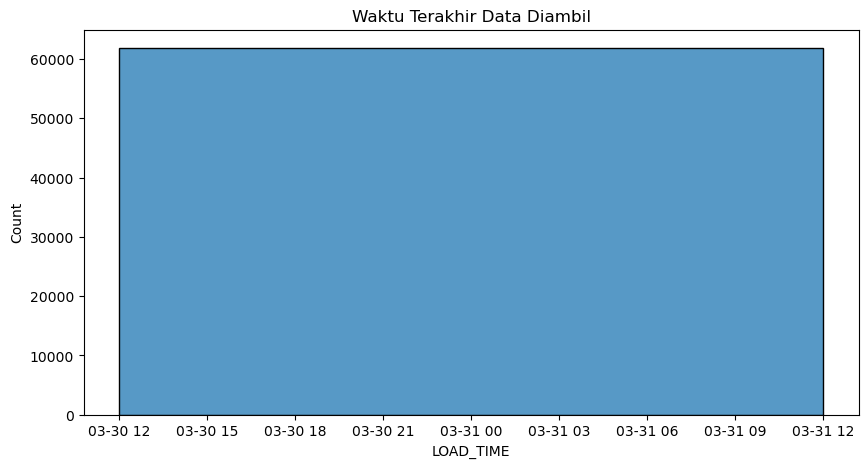

In [147]:
plt.figure(figsize=(10,5))
sns.histplot(x='LOAD_TIME', data=new_df)
plt.title("Waktu Terakhir Data Diambil")
plt.show()

## Multivariate

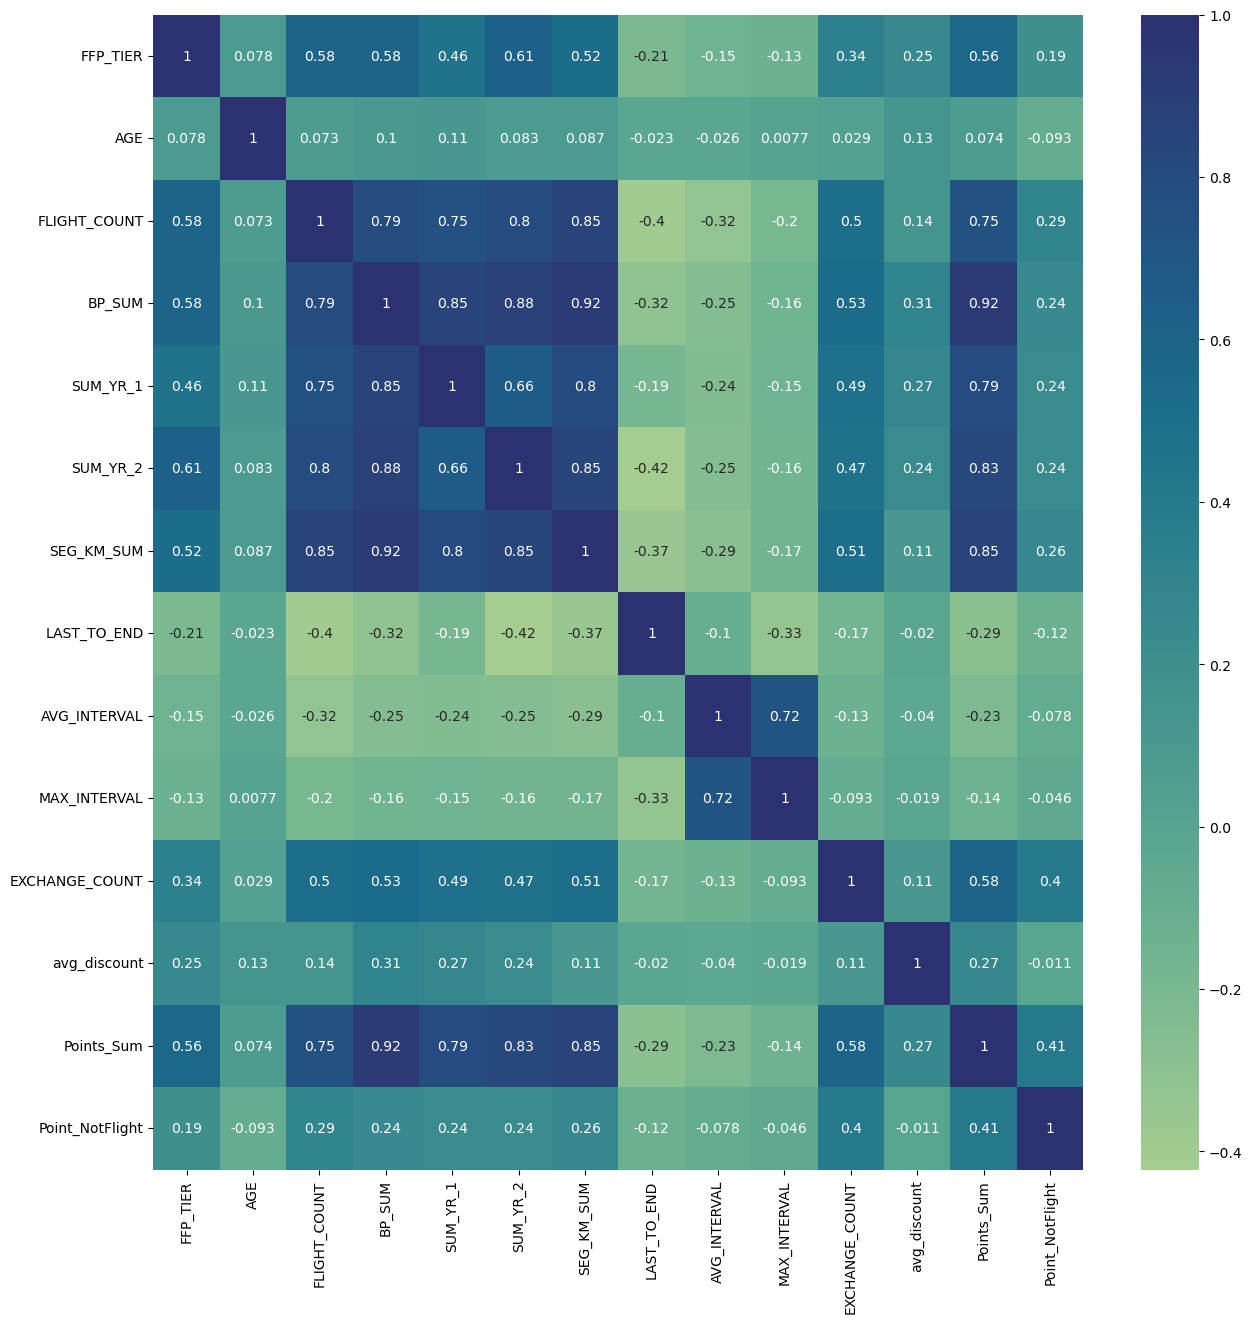

In [148]:
plt.figure(figsize=(15,15))
sns.heatmap(new_df.corr(), cmap='crest', annot=True)
plt.show()

- `FLIGHT_COUNT` berkorelasi kuat dengan `BP_SUM` = 0.79
- `FLIGHT_COUNT` berkorelasi kuat dengan `SUM_YR_1` = 0.75
- `FLIGHT_COUNT` berkorelasi kuat dengan `SUM_YR_2` = 0.79
- `FLIGHT_COUNT` berkorelasi kuat dengan `SEG_KM_SUM` = 0.85
- `POINT_SUM` berkorelasi kuat dengan `FLIGHT_COUNT` = 0.75
- `POINT_SUM` berkorelasi kuat dengan `BP_SUM` = 0.92
- `POINT_SUM` berkorelasi kuat dengan `SUM_YR_1` = 0.79
- `POINT_SUM` berkorelasi kuat dengan `SUM_YR_2` = 0.83
- `POINT_SUM` berkorelasi kuat dengan `SEG_KM_SUM` = 0.85
- `BP_SUM` berkorelasi kuat dengan `SUM_YR_1` = 0.85
- `BP_SUM` berkorelasi kuat dengan `SUM_YR_2` = 0.88
- `BP_SUM` berkorelasi kuat dengan `SEG_KM_SUM` = 0.92
- `SUM_YR_1` berkorelasi kuat dengan `SEG_KM_SUM` = 0.8
- `SUM_YR_2` berkorelasi kuat dengan `SEG_KM_SUM` = 0.85



# Normalization & Standardization

In [149]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

1. Normalization = `FFP_TIER`,`FLIGHT_COUNT`,`BP_SUM`,`SUM_YR_1`,`SUM_YR_2`,`SEG_KM_SUM`,`LAST_TO_END`,`AVG_INTERVAL`,`MAX_INTERVAL`,`EXCHANGE_COUNT`,`Points_Sum`,`Point_NotFLight`
2. Standardization = `AGE`,`avg_discount`

In [150]:
final_df = new_df.copy()
norm = final_df[['FFP_TIER','FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2','SEG_KM_SUM','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT','Points_Sum','Point_NotFlight']]
stdr = final_df[['AGE', 'avg_discount']]

In [151]:
#sebelum scaling
new_df[numerical].describe()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,61853.000000,61853.000000,61853.000000,61853.000000,61853.000000,61853.000000,61853.000000,61853.000000,61853.000000,61853.000000,61853.000000,61853.000000,61853.000000,61853.000000
mean,4.103455,42.490227,11.964092,11041.307099,5374.920009,5661.918872,17303.413982,172.607020,68.155922,167.461853,0.324156,0.721648,12681.148578,2.758460
std,0.375841,9.883998,14.115933,16394.739466,8124.148736,8702.667252,21040.271436,181.236049,77.685686,123.157479,1.144005,0.184796,20597.748421,7.404423
min,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,35.000000,3.000000,2591.000000,1020.000000,833.000000,4866.000000,29.000000,23.750000,81.000000,0.000000,0.612642,2847.000000,0.000000
50%,4.000000,41.000000,7.000000,5800.000000,2815.000000,2826.000000,10183.000000,105.000000,45.000000,144.000000,0.000000,0.711826,6442.000000,0.000000
75%,4.000000,48.000000,15.000000,12975.000000,6600.000000,6912.000000,21497.000000,260.000000,82.500000,229.000000,0.000000,0.808835,14457.000000,1.000000
max,6.000000,92.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000


In [152]:
final_df['FFP_TIER'] = MinMaxScaler().fit_transform(final_df['FFP_TIER'].values.reshape(len(final_df), 1))
final_df['FLIGHT_COUNT'] = MinMaxScaler().fit_transform(final_df['FLIGHT_COUNT'].values.reshape(len(final_df), 1))
final_df['BP_SUM'] = MinMaxScaler().fit_transform(final_df['BP_SUM'].values.reshape(len(final_df), 1))
final_df['SUM_YR_1'] = MinMaxScaler().fit_transform(final_df['SUM_YR_1'].values.reshape(len(final_df), 1))
final_df['SUM_YR_2'] = MinMaxScaler().fit_transform(final_df['SUM_YR_2'].values.reshape(len(final_df), 1))
final_df['SEG_KM_SUM'] = MinMaxScaler().fit_transform(final_df['SEG_KM_SUM'].values.reshape(len(final_df), 1))
final_df['LAST_TO_END'] = MinMaxScaler().fit_transform(final_df['LAST_TO_END'].values.reshape(len(final_df), 1))
final_df['AVG_INTERVAL'] = MinMaxScaler().fit_transform(final_df['AVG_INTERVAL'].values.reshape(len(final_df), 1))
final_df['MAX_INTERVAL'] = MinMaxScaler().fit_transform(final_df['MAX_INTERVAL'].values.reshape(len(final_df), 1))
final_df['EXCHANGE_COUNT'] = MinMaxScaler().fit_transform(final_df['EXCHANGE_COUNT'].values.reshape(len(final_df), 1))
final_df['Points_Sum'] = MinMaxScaler().fit_transform(final_df['Points_Sum'].values.reshape(len(final_df), 1))
final_df['Point_NotFlight'] = MinMaxScaler().fit_transform(final_df['Point_NotFlight'].values.reshape(len(final_df), 1))

In [153]:
final_df['AGE'] = StandardScaler().fit_transform(final_df['AGE'].values.reshape(len(final_df), 1))
final_df['avg_discount'] = StandardScaler().fit_transform(final_df['avg_discount'].values.reshape(len(final_df), 1))

In [154]:
#setelah scaling
final_df[numerical].describe()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,61853.000000,6.185300e+04,61853.000000,61853.000000,61853.000000,61853.000000,61853.000000,61853.000000,61853.000000,61853.000000,61853.000000,6.185300e+04,61853.000000,61853.000000
mean,0.051727,1.415000e-15,0.047223,0.021851,0.022437,0.024177,0.029181,0.235078,0.093621,0.230030,0.007047,-2.143012e-15,0.012867,0.019703
std,0.187920,1.000008e+00,0.066900,0.032445,0.033913,0.037161,0.036255,0.248269,0.106711,0.169172,0.024870,1.000008e+00,0.020899,0.052889
min,0.000000,-3.691879e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.905136e+00,0.000000,0.000000
25%,0.000000,-7.578196e-01,0.004739,0.005128,0.004258,0.003557,0.007751,0.038356,0.032624,0.111264,0.000000,-5.898788e-01,0.002889,0.000000
50%,0.000000,-1.507729e-01,0.023697,0.011478,0.011751,0.012067,0.016912,0.142466,0.061813,0.197802,0.000000,-5.314924e-02,0.006536,0.000000
75%,0.000000,5.574483e-01,0.061611,0.025677,0.027551,0.029515,0.036407,0.354795,0.113324,0.314560,0.000000,4.718041e-01,0.014669,0.007143
max,1.000000,5.009124e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.211986e+00,1.000000,1.000000


# PCA

In [168]:
from sklearn.decomposition import PCA
pcs = PCA(n_components=2).fit_transform(final_df[numerical])
new_final = pd.DataFrame(data=pcs, columns=['PC1','PC2'])
new_final.describe()

,PC1,PC2
count,6.185300e+04,6.185300e+04
mean,-4.733395e-16,-6.492434e-16
std,1.066021e+00,9.309059e-01
min,-4.555990e+00,-4.218509e+00
25%,-6.835942e-01,-5.731964e-01
50%,-8.103510e-02,3.572446e-02
75%,5.707352e-01,6.035856e-01
max,6.019224e+00,4.360456e+00
